<a href="https://colab.research.google.com/github/dipanshusankhala/ML-codes/blob/main/Mall5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=df.iloc[:,3:]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


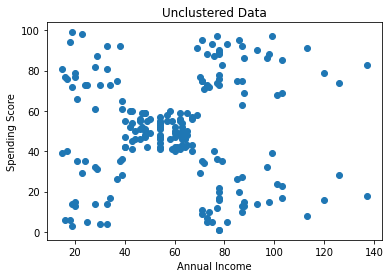

In [6]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [8]:
km=KMeans(n_clusters=3)

In [9]:
x.shape

(200, 2)

In [10]:
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [11]:
#sum square error
km.inertia_

106348.37306211122

In [16]:
sse=[]
for k in range(1,16):
   km = KMeans(n_clusters=k)
   km.fit_predict(x)
   sse.append(km.inertia_) 

In [17]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30227.606513152008,
 25063.6525158641,
 21850.165282585636,
 19740.0103703593,
 17515.872164701657,
 15814.933389191454,
 14285.000492043211,
 13192.983094098883,
 11814.710744140913]

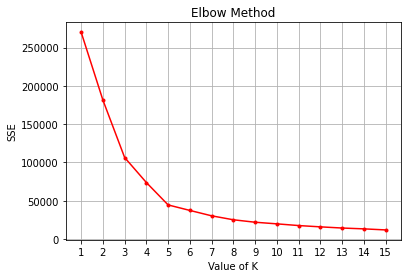

In [18]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red')

In [19]:
from sklearn.metrics import silhouette_score

In [23]:
silh=[]
for k in range(2,16):
     km=KMeans(n_clusters=k)
     labels=km.fit_predict(x)
     score=silhouette_score(x,labels)
     silh.append(score)

In [24]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5270287298101395,
 0.4572211842776841,
 0.4592339450478494,
 0.45310125985052596,
 0.43560008750473395,
 0.42507724579994494,
 0.4249829527479061,
 0.4358444190569202,
 0.4240727795746043]

<BarContainer object of 14 artists>

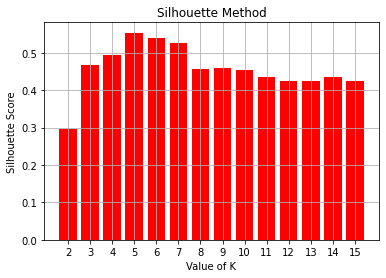

In [25]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh,color='red')

In [26]:
km=KMeans(n_clusters=5,random_state=0)

In [27]:
labels=km.fit_predict(x)

In [28]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [29]:
cent=km.cluster_centers_

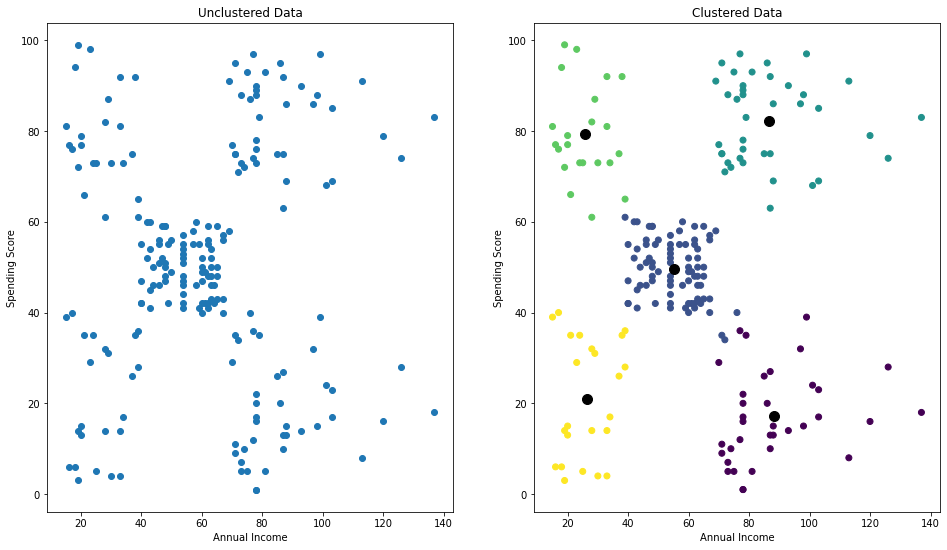

In [30]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')

In [31]:
km.inertia_

44448.4554479337

In [32]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [33]:
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
16,17,Female,35,21,35
18,19,Male,52,23,29


In [34]:
four=df[labels==4]

four.to_csv('mydata.csv')

In [35]:
km.predict([[56,61]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

In [36]:
agl=AgglomerativeClustering(n_clusters=5)

alabels=agl.fit_predict(x)

In [37]:
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

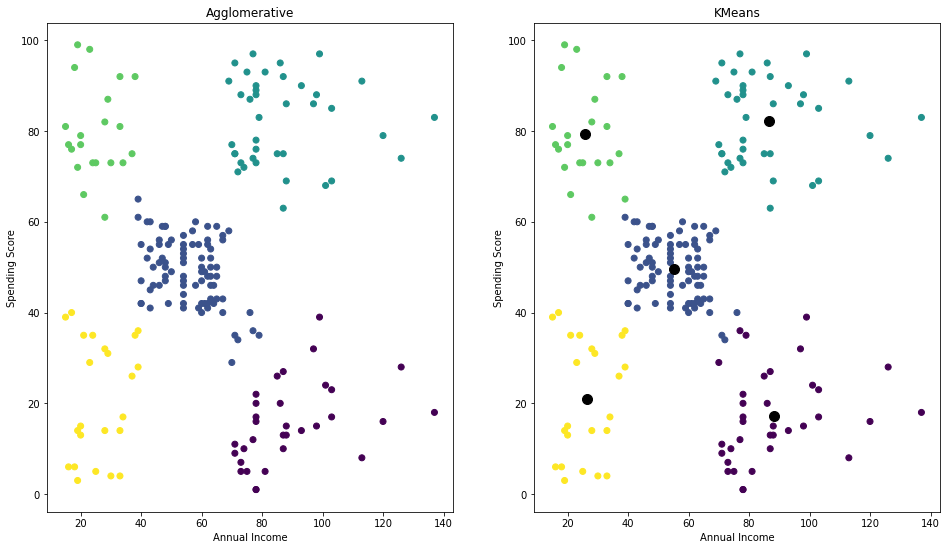

In [38]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels)


plt.subplot(1,2,2)
plt.title('KMeans')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')